# Météo France - Daily Rainfall Forecasting

In [40]:
# !pip install "xarray==0.19.0" importlib-metadata==4.10.1 "importlib-resources<5"
# !pip install geopandas

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xarray as xr

## Explore train data

In [42]:
X_station_train_df = pd.read_csv("../../Hackathon/Train/X_station_train.csv", index_col=["Id"])
X_station_train_df

,number_sta,date,ff,t,td,hu,dd,precip
Id,,,,,,,,
14066001_0_0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0
14066001_0_1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0
14066001_0_2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0
14066001_0_3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0
14066001_0_4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0
...,...,...,...,...,...,...,...,...
95690001_729_19,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0
95690001_729_20,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0
95690001_729_21,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0


In [37]:
print("Number of different stations: ", X_station_train_df.number_sta.nunique())
print("Number of different stations: ", X_station_train_df.number_sta.nunique())

Number of different stations:  267


In [39]:
X_2D_arome_interp_2016_df = pd.read_csv("../../Hackathon/Train/X_2D_arome_interp_2016.csv")
X_2D_arome_interp_2016_df

,Unnamed: 0,number_sta,time,valid_time,ws,p3031,u10,v10,t2m,d2m,r,tp,msl
0,0,86118001,2016-06-19,2016-06-19 00:00:00,2.360735,300.570129,2.031857,-1.197647,287.520206,284.392389,81.496266,NaN,102614.380009
1,1,86149001,2016-06-19,2016-06-19 00:00:00,2.059683,278.237361,2.036379,-0.298119,285.289130,283.076365,86.347620,NaN,102619.765078
2,2,56081003,2016-06-19,2016-06-19 00:00:00,2.586343,287.103175,2.467196,-0.757305,283.136152,281.679318,90.649944,NaN,102775.500604
3,3,53215001,2016-06-19,2016-06-19 00:00:00,1.873133,282.026020,1.828928,-0.390428,283.009130,282.154606,94.419616,NaN,102656.699157
4,4,22135001,2016-06-19,2016-06-19 00:00:00,1.197948,225.409073,0.868830,0.800126,282.722457,281.852696,94.300453,NaN,102742.146704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746245,2746245,86137003,2016-12-04,2016-12-05 00:00:00,2.384466,102.721949,-2.311351,0.542785,274.807369,274.330059,96.638182,0.013103,102085.626464
2746246,2746246,86165005,2016-12-04,2016-12-05 00:00:00,2.264505,62.095931,-2.012222,-1.027742,274.753123,273.980873,94.593653,0.013449,102101.049983
2746247,2746247,86273001,2016-12-04,2016-12-05 00:00:00,1.664062,81.866581,-1.533742,-0.153866,275.365047,274.171669,91.821377,0.018676,102118.606509
2746248,2746248,91200002,2016-12-04,2016-12-05 00:00:00,1.613571,70.839039,-1.524053,-0.529592,272.754375,272.365318,96.831198,0.000491,102355.386009


In [12]:
stations_coordinates_df = pd.read_csv("../../Hackathon/Other/stations_coordinates.csv", index_col = "number_sta")
print("Number of meteo stations: ", stations_coordinates_df.index.size)
stations_coordinates_df

Number of meteo stations:  325


,lat,lon,height_sta
number_sta,,,
86118001,46.477,0.985,120.0
86149001,46.917,0.025,60.0
56081003,48.050,-3.660,165.0
53215001,47.790,-0.710,63.0
22135001,48.550,-3.380,148.0
...,...,...,...
86137003,47.035,0.098,96.0
86165005,46.412,0.841,153.0
86273001,46.464,1.042,121.0


In [ ]:
df = stations_train_df[stations_train_df.date=="2016-01-01 00:00:00"]
df_merge = pd.merge(df, stations_coordinates_df, on='number_sta')
df_merge

### Plot data on map

In [26]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

(45.25899999999999, 51.96)

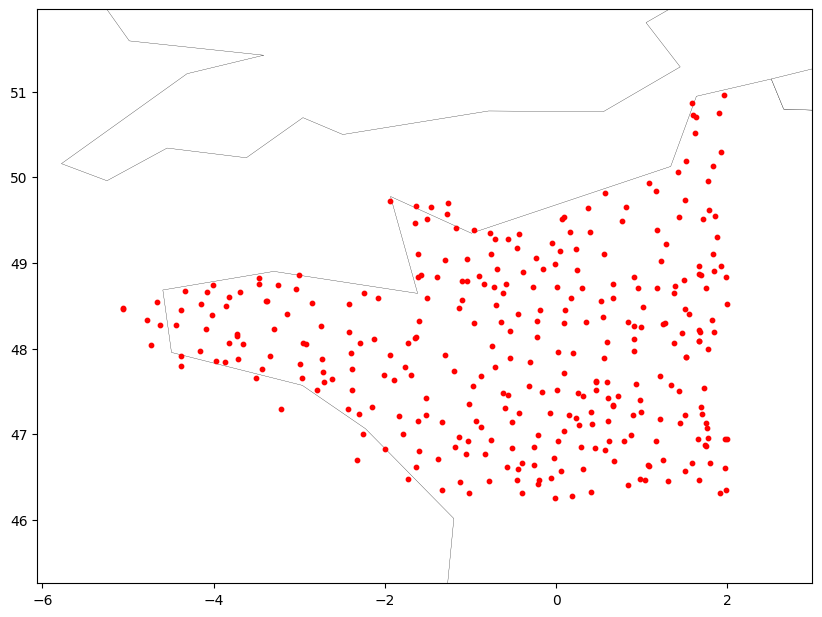

In [27]:
# Load world map & meteo station positions
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
stations_coordinates_gpd = gpd.GeoDataFrame(stations_coordinates_df, geometry = gpd.points_from_xy(stations_coordinates_df.lon, stations_coordinates_df.lat))

# Plot data 
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_aspect('equal')
world.plot(ax = ax, color = 'white', edgecolor = 'black', linewidth = 0.2)                 # Display world map
stations_coordinates_gpd.plot(ax = ax, marker = 'o', color = 'red', markersize = 10)       # Display meteo stations
ax.set_xlim([stations_coordinates_gpd.lon.min() - 1, stations_coordinates_gpd.lon.max() + 1])
ax.set_ylim([stations_coordinates_gpd.lat.min() - 1, stations_coordinates_gpd.lat.max() + 1])

Text(0.5, 1.0, '2016-01-01 00h00 : 249 stations')

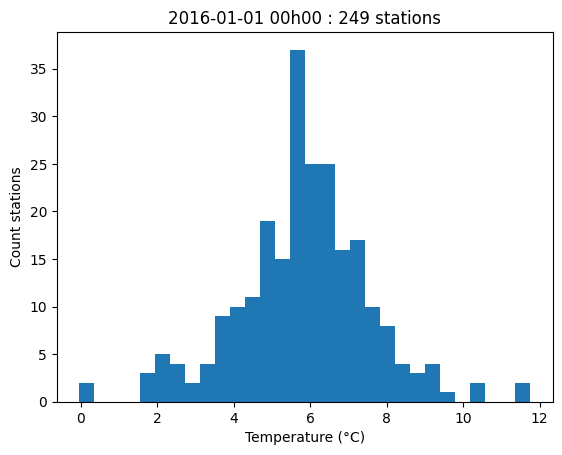

In [31]:
temp_ds = X_station_train_df[X_station_train_df['date'] == "2016-01-01 00:00:00"]

temp = temp_ds.t.values - 273.15

plt.hist(temp, bins=30)  # density = False would make counts
plt.ylabel('Count stations')
plt.xlabel('Temperature (°C)')
plt.title(f"2016-01-01 00h00 : {len(temp_ds.index)} stations")

In [36]:
NW_masks = xr.open_dataset("../../Hackathon/Other/NW_masks.nc")
NW_masks

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html